<a href="https://colab.research.google.com/github/VladislavErmakovich/TMSds/blob/develop/lesson16/hw16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression


In [2]:
wine = datasets.load_wine(as_frame=True)
wine

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

In [ ]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

<Axes: >

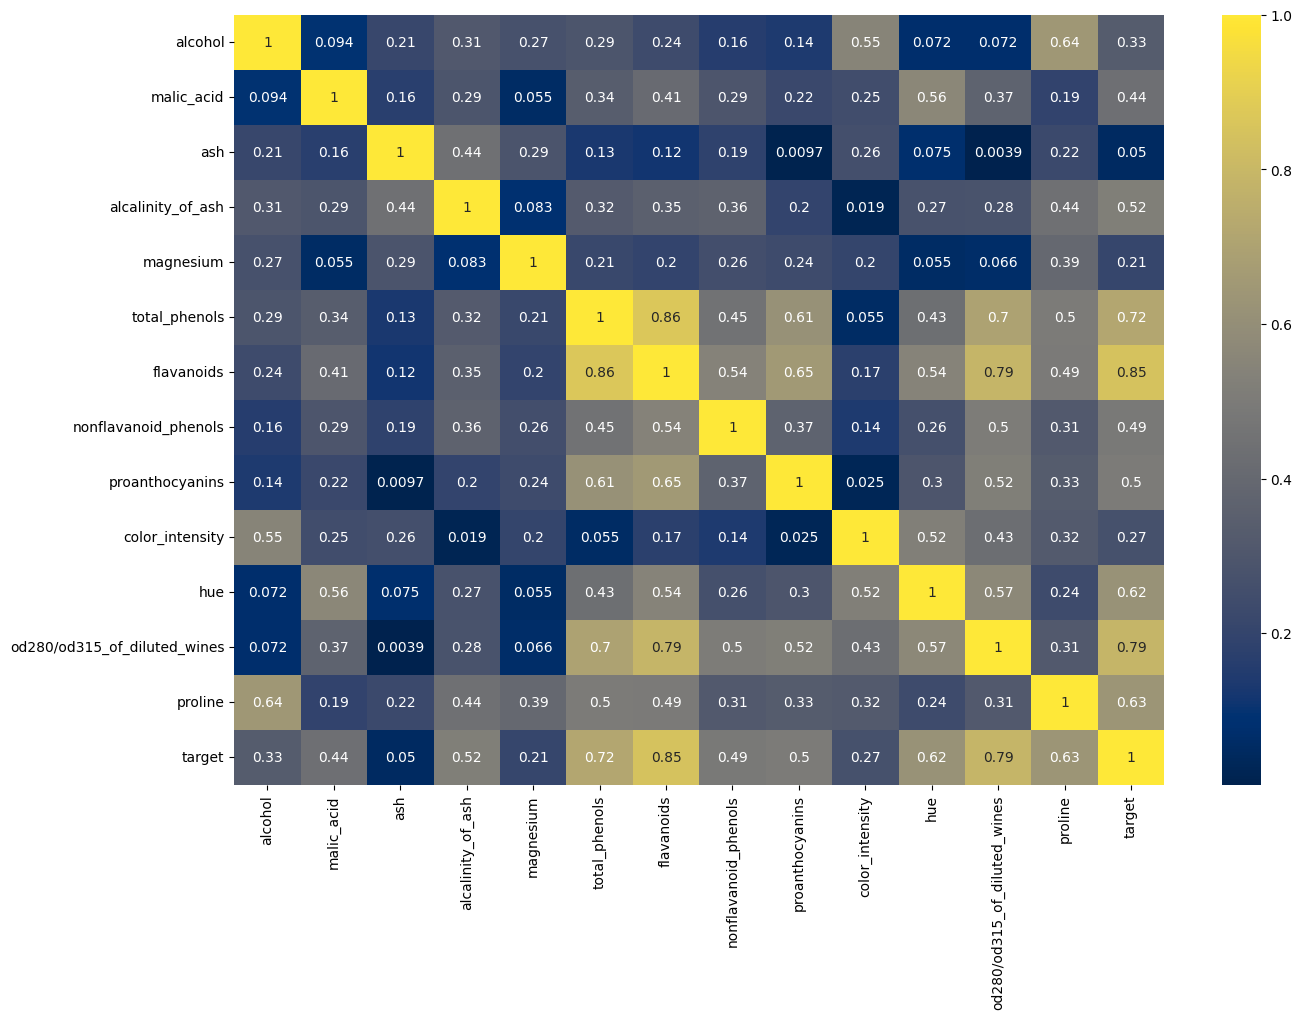

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr().abs(), annot=True,cmap='cividis')

Высокая корреляция наблюдается:

  
  flavanoids
  
   od280/od315_of_diluted_wines

   total_phenols


In [ ]:
np.bincount(df.target)

array([59, 71, 48])

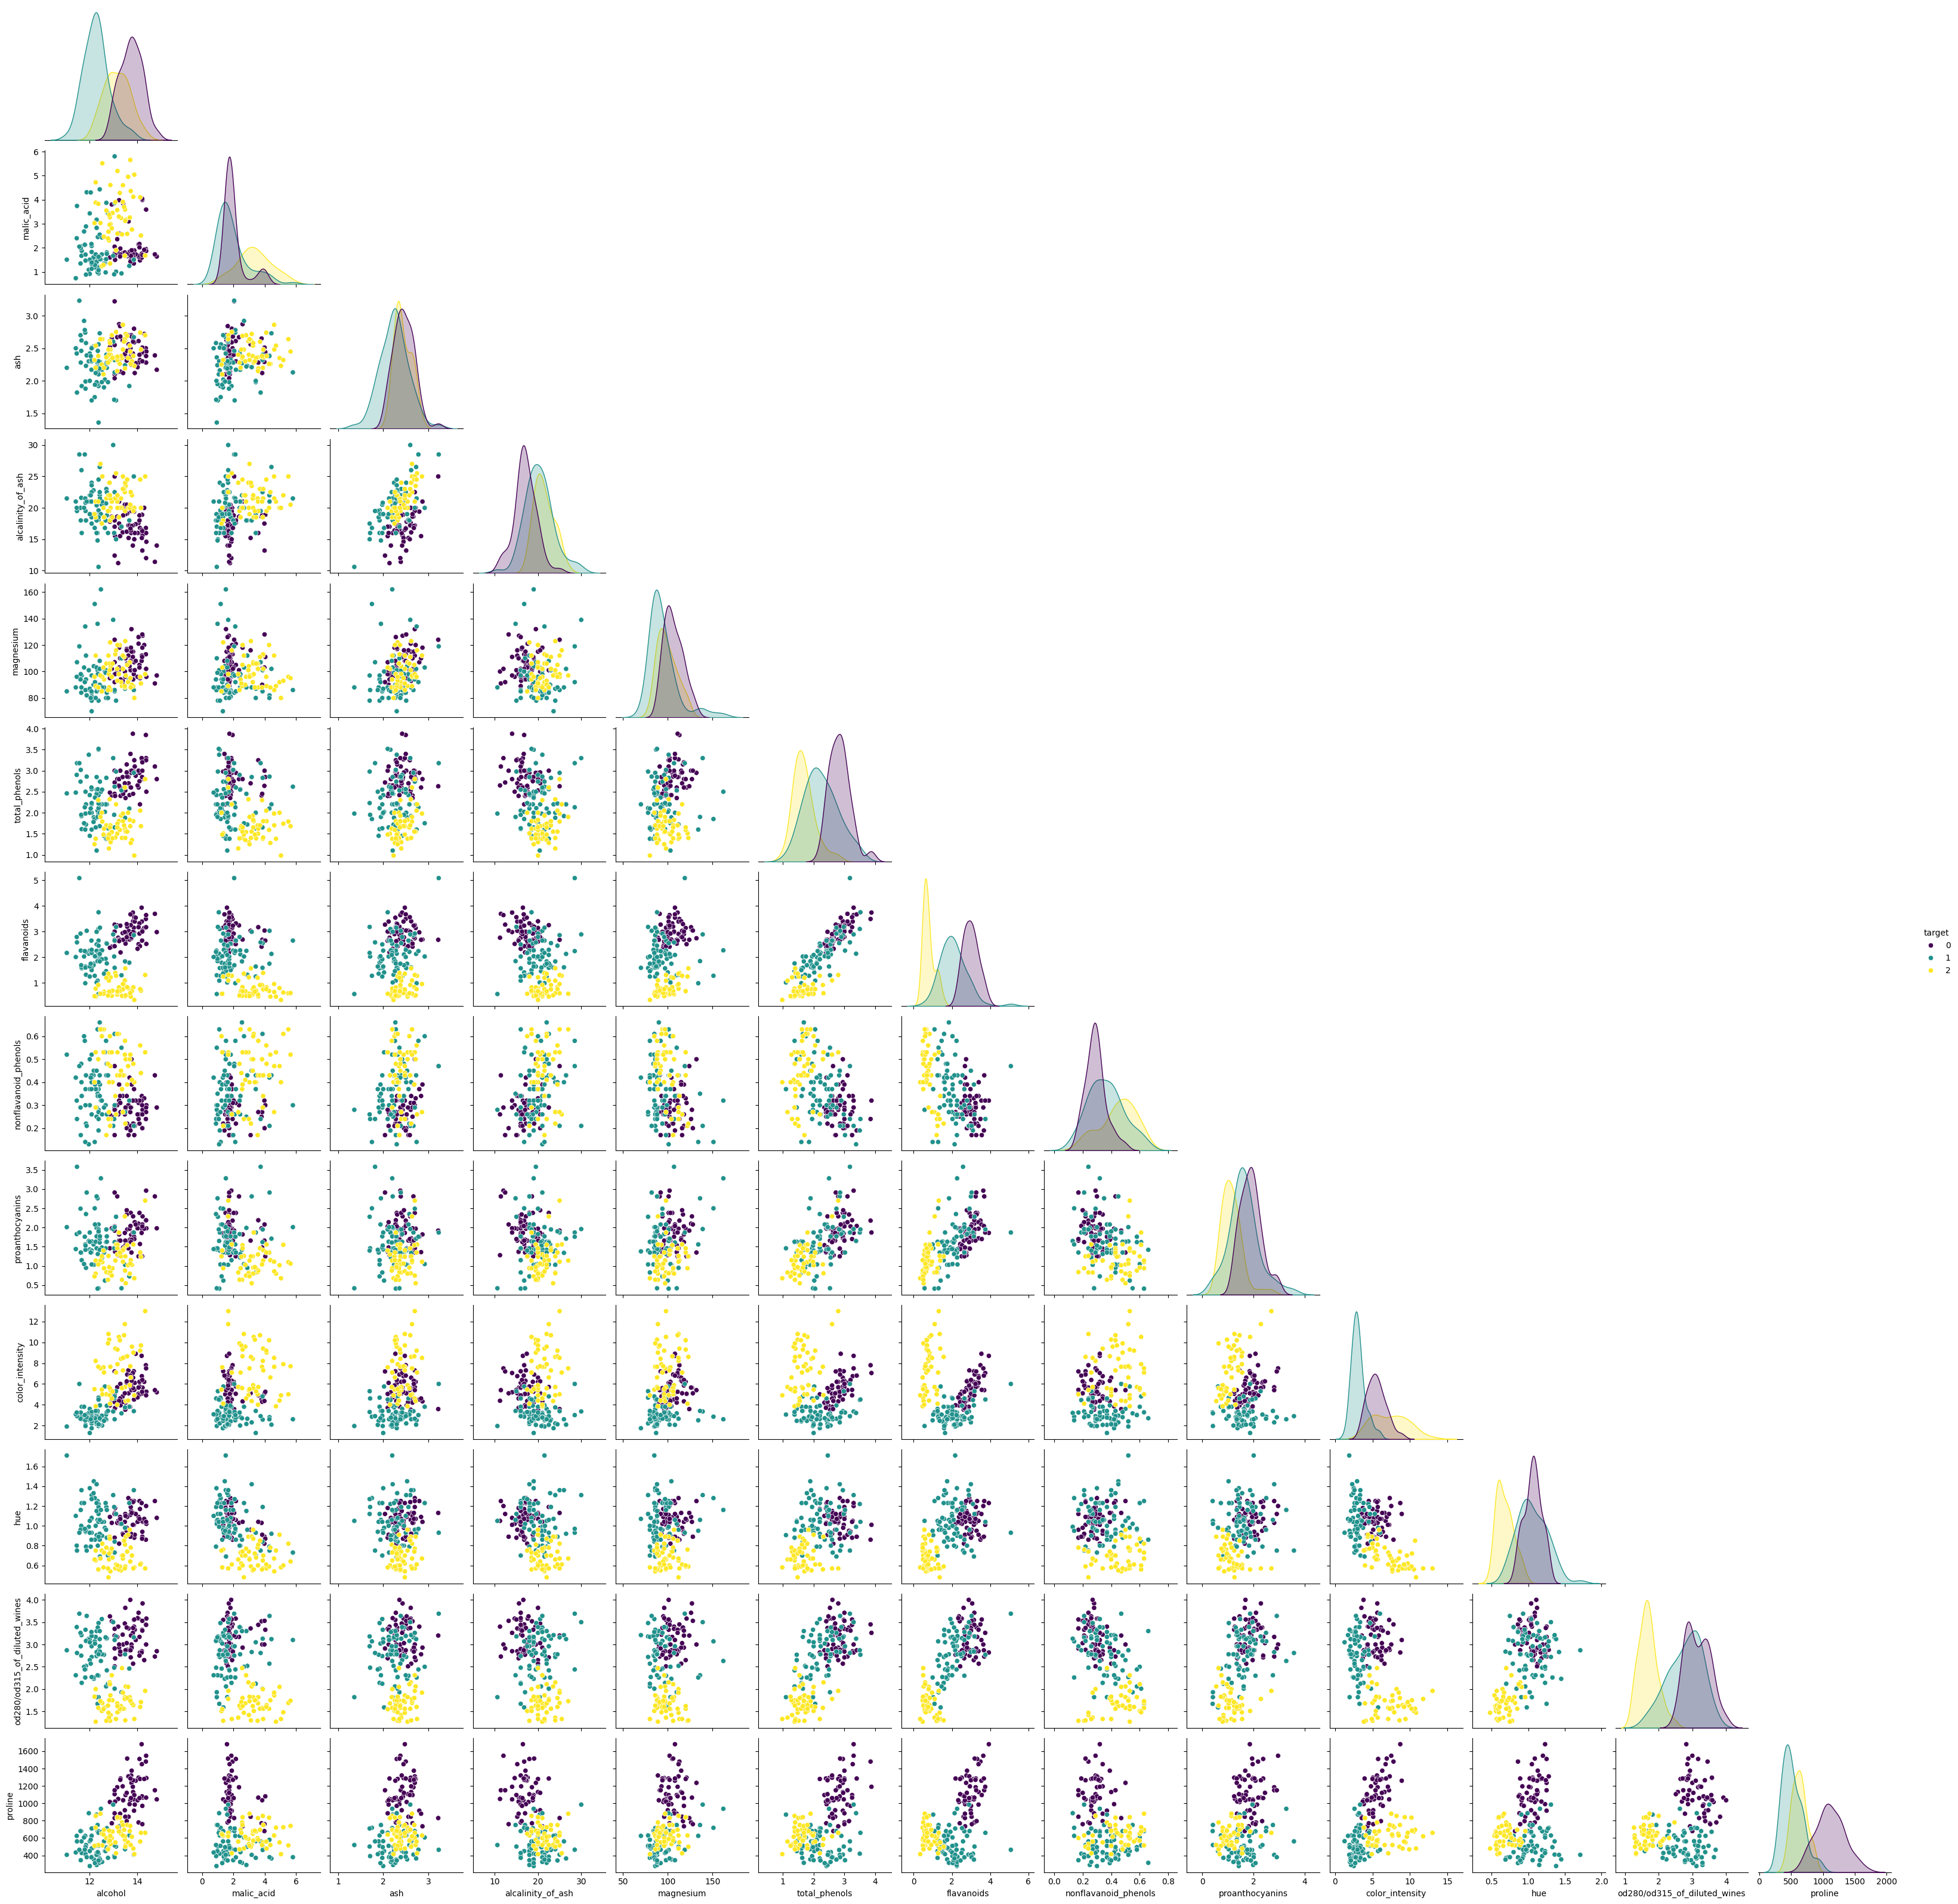

In [ ]:
sns.pairplot(data=df, hue='target', palette='viridis',corner=True)

# Разделение по flavanoids

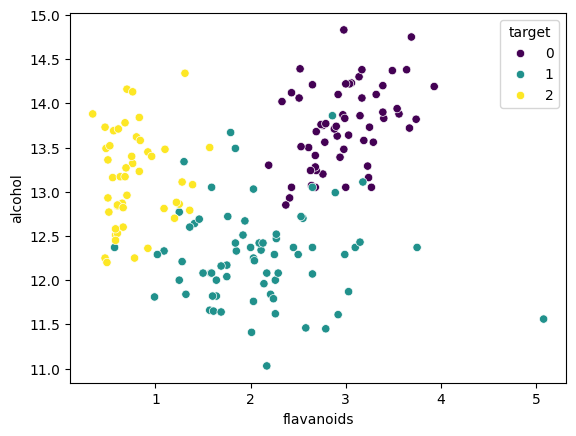

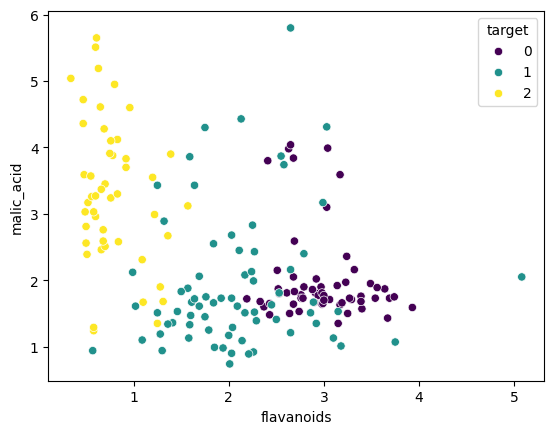

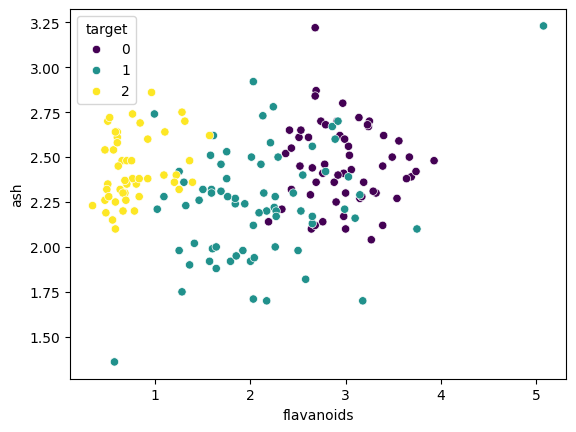

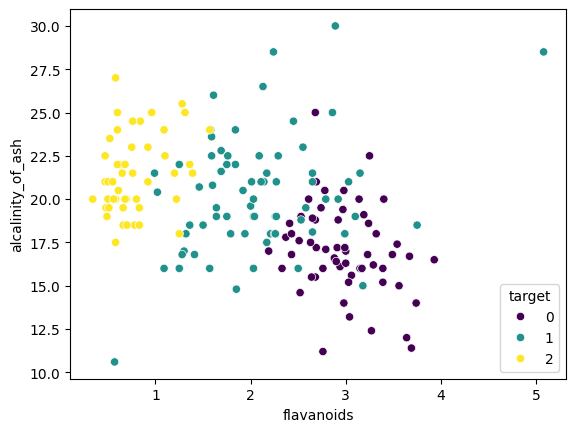

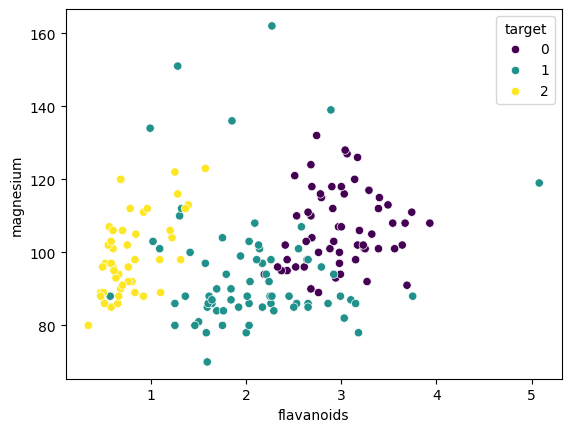

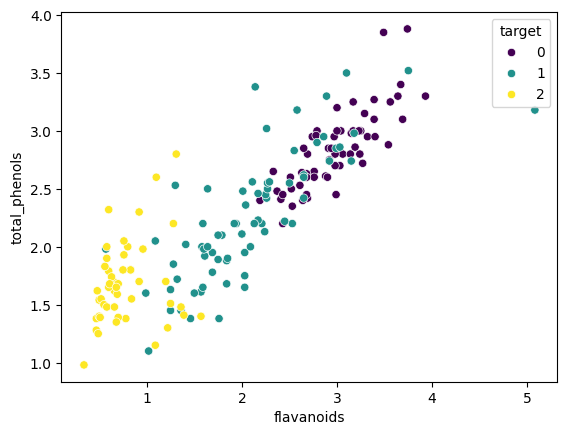

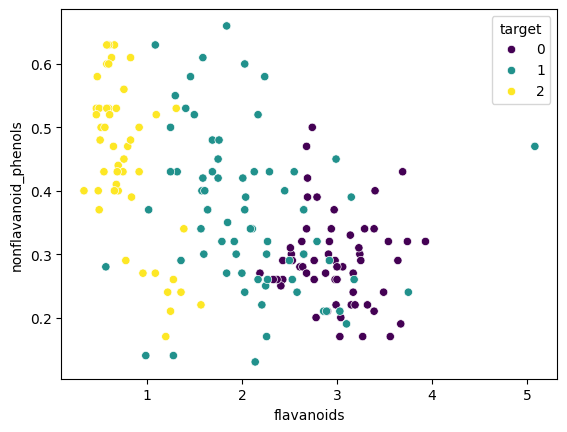

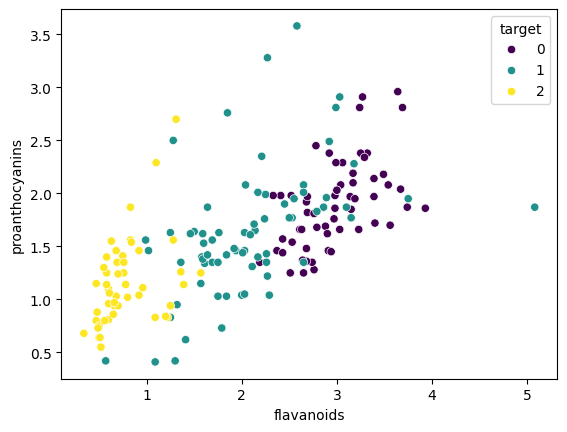

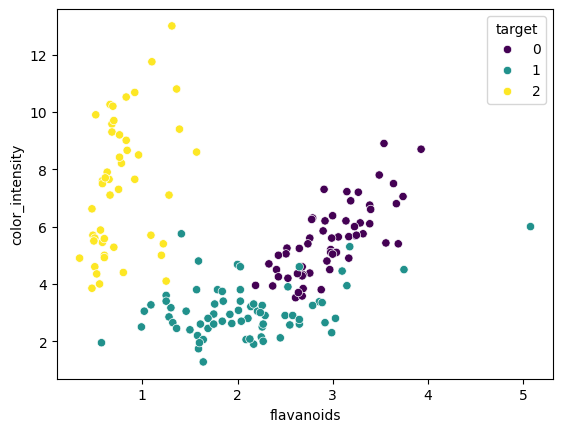

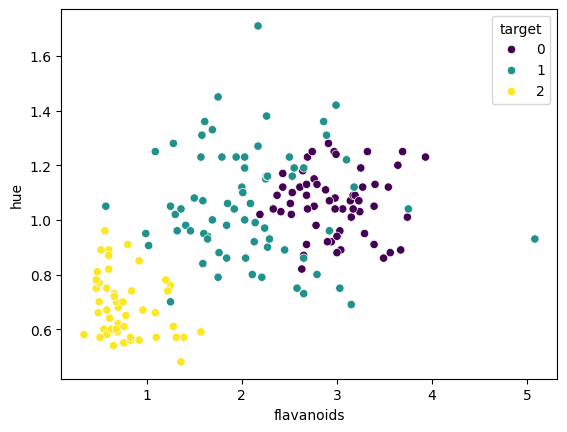

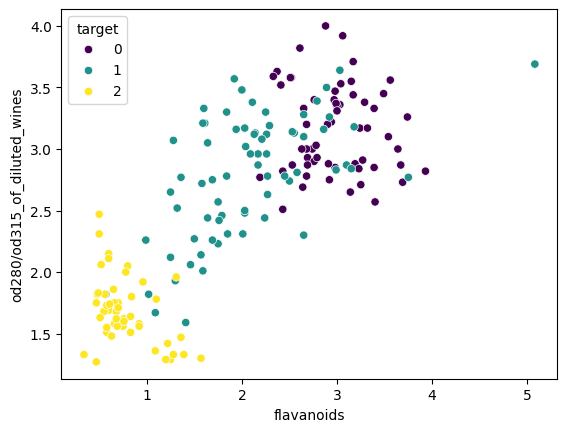

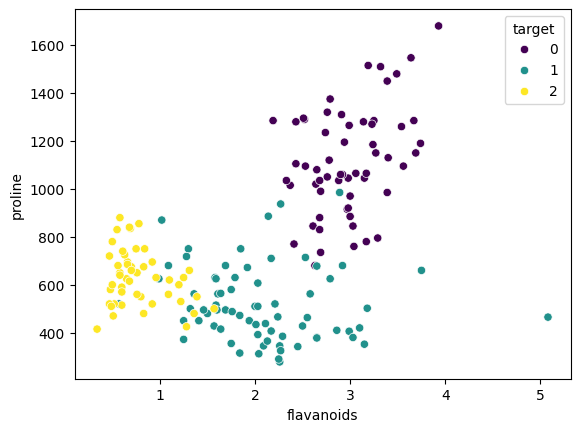

In [ ]:
for column, val in df[:-1].items():
  if column != 'flavanoids' and column != 'target':
    sns.scatterplot(data=df, x = 'flavanoids', y = column, hue ='target',palette='viridis')
    plt.show()

# Разделение по od280/od315_of_diluted_wines

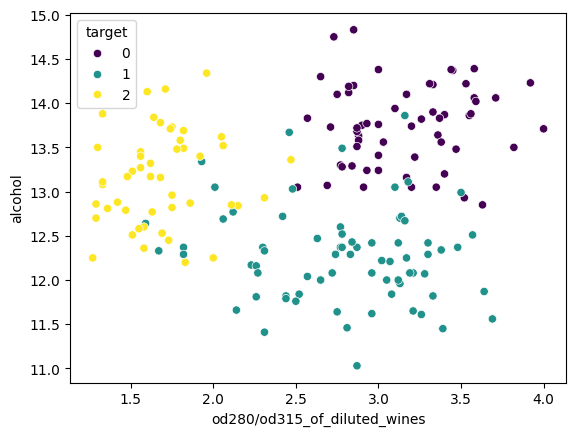

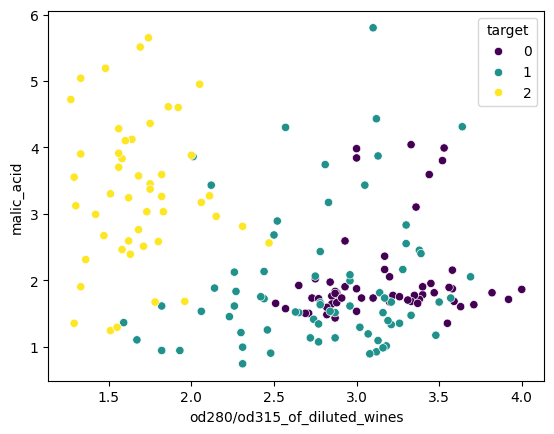

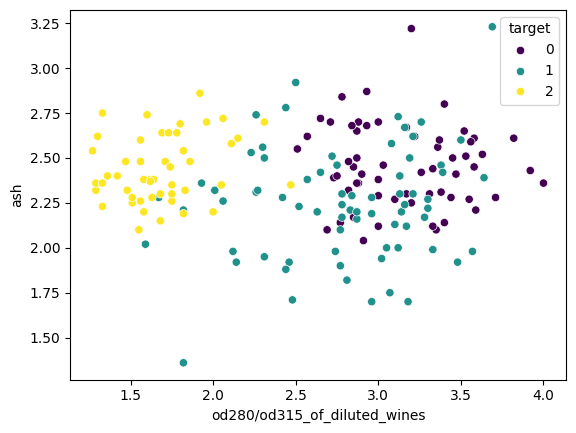

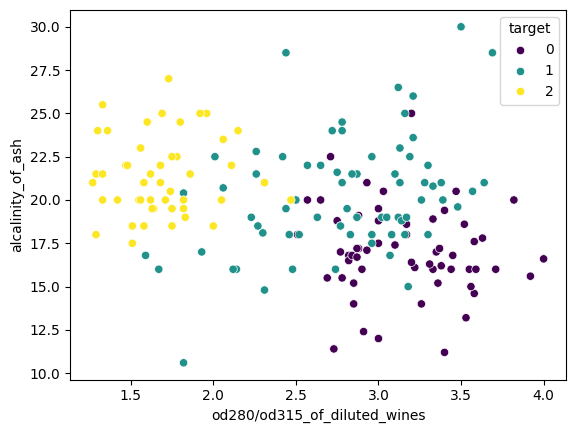

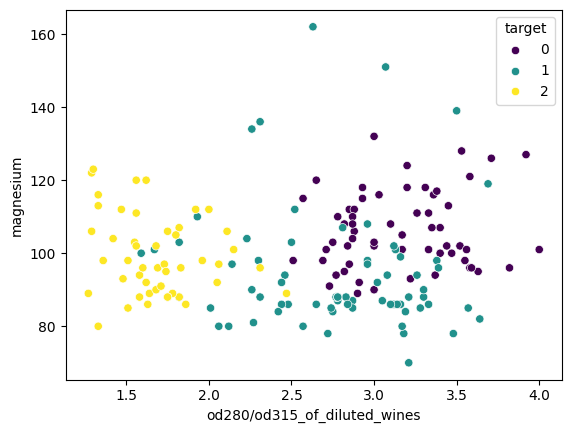

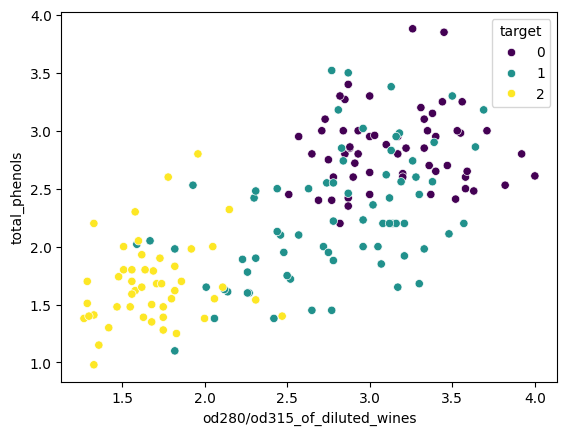

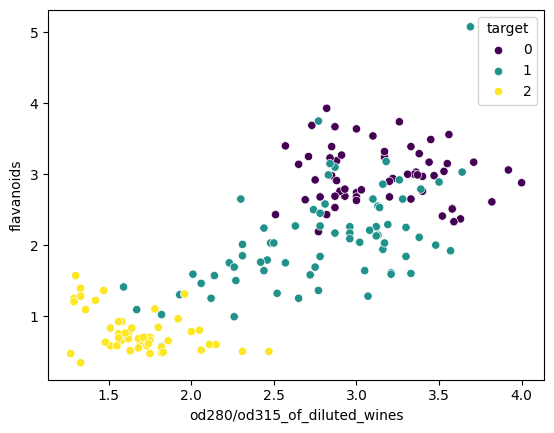

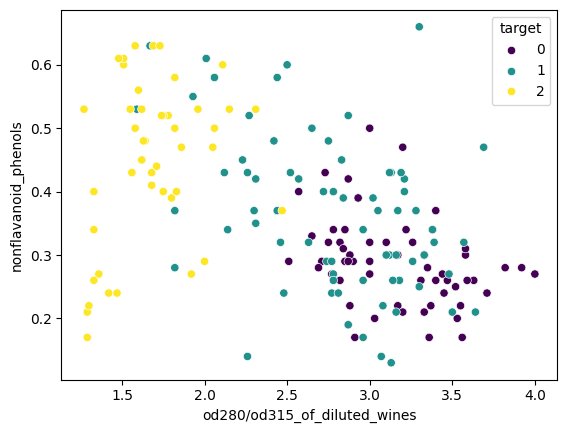

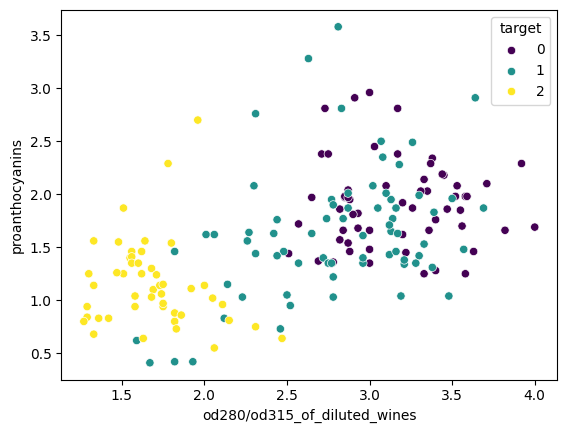

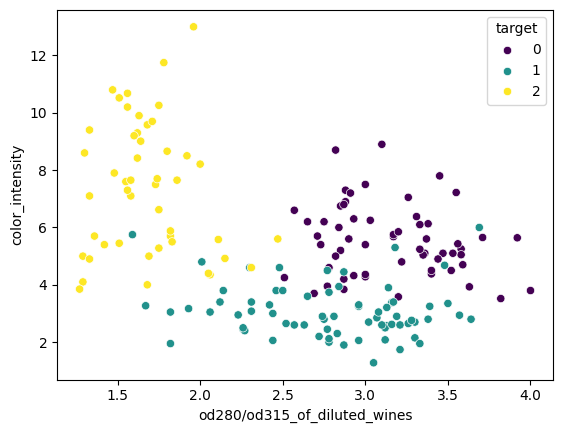

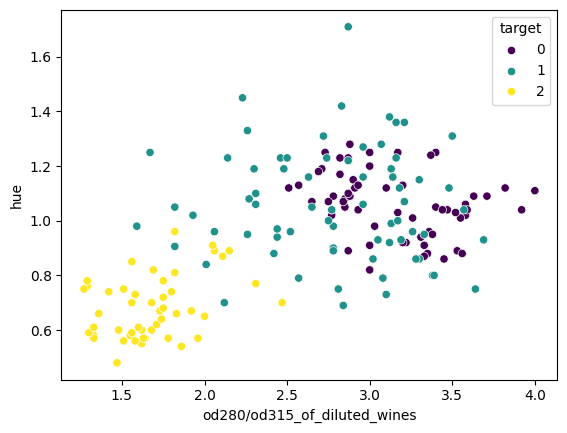

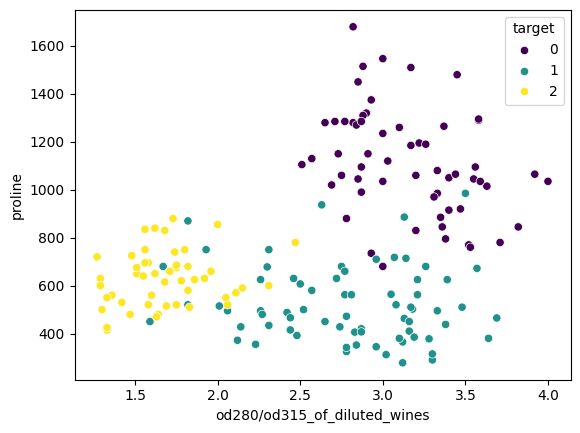

In [ ]:
for column, val in df[:-1].items():
  if column != 'od280/od315_of_diluted_wines' and column != 'target':
    sns.scatterplot(data=df, x = 'od280/od315_of_diluted_wines', y = column, hue ='target',palette='viridis')
    plt.show()

# Разделение по total_phenols

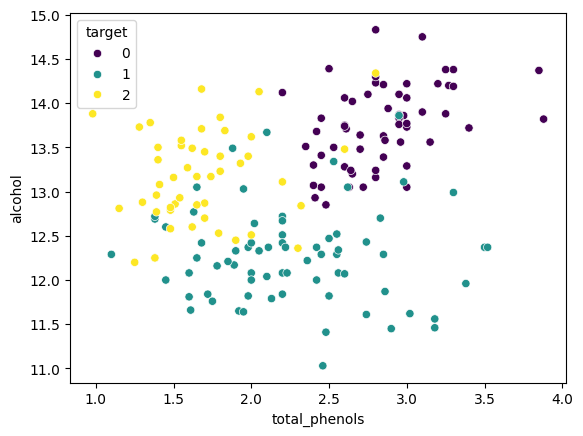

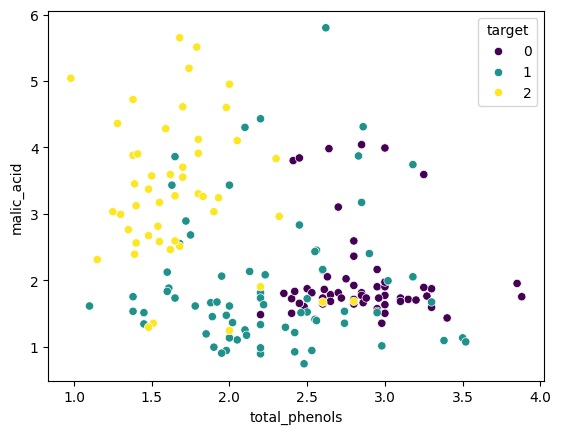

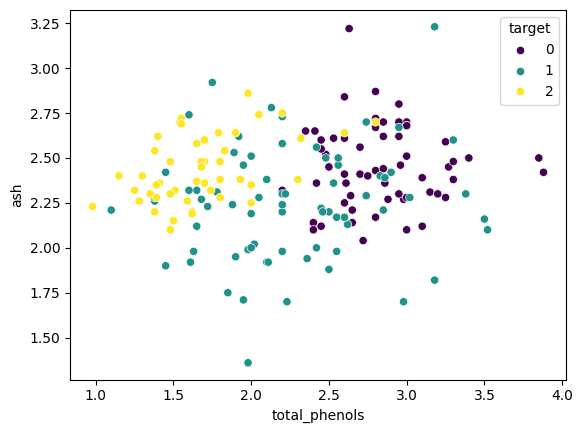

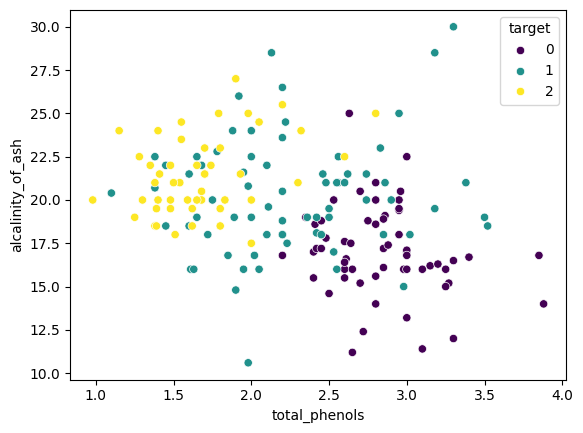

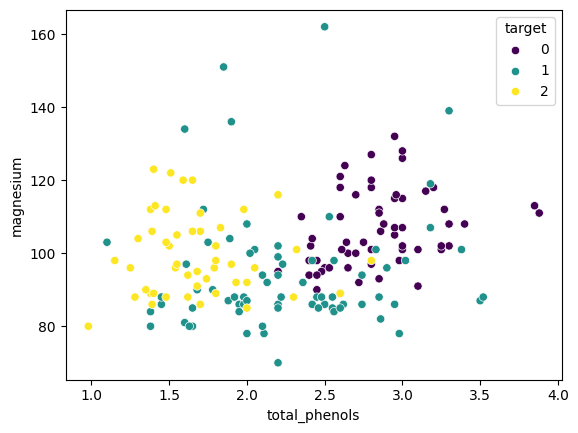

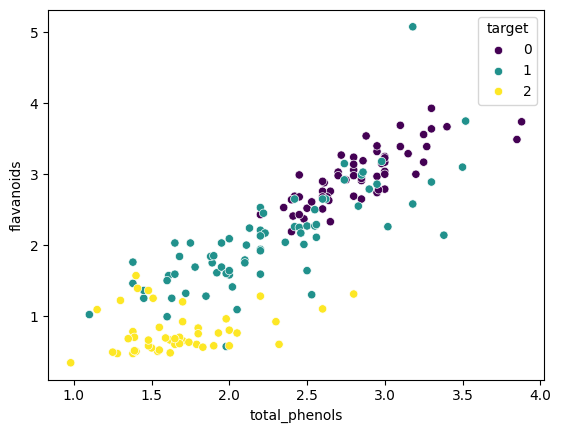

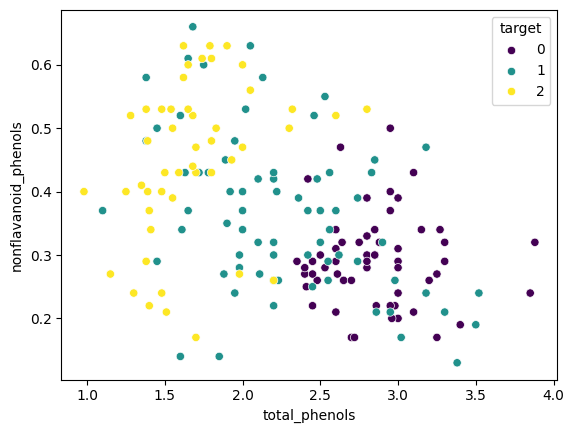

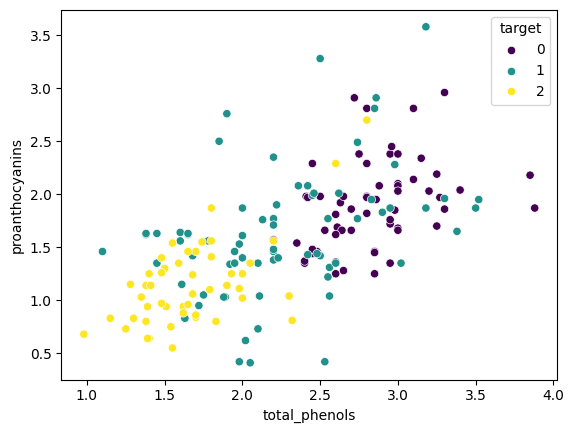

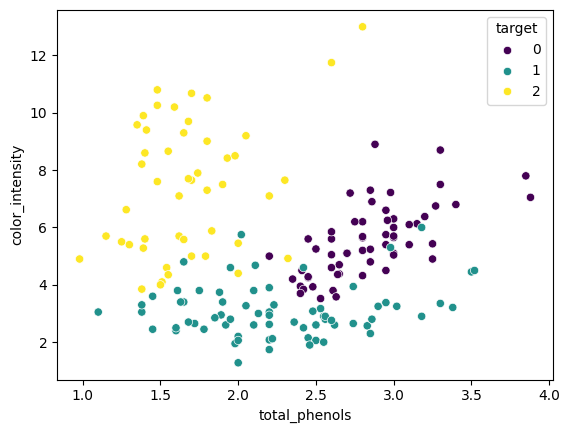

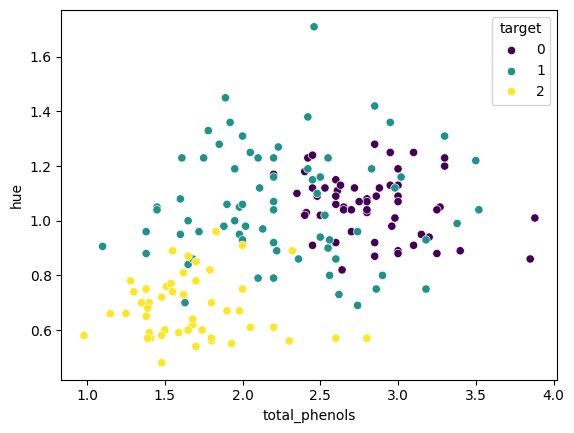

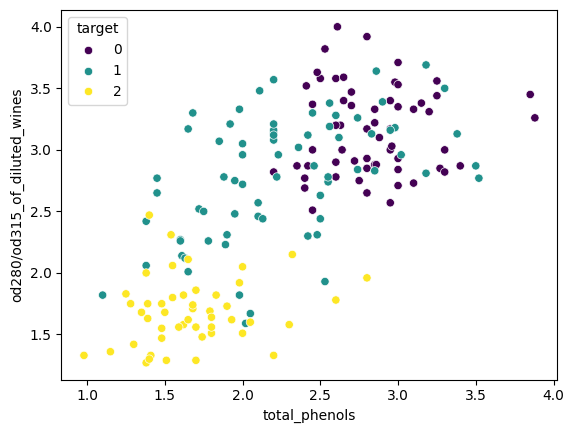

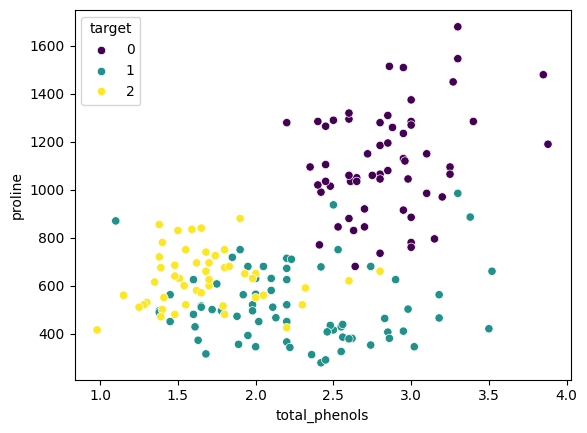

In [ ]:
for column, val in df[:-1].items():
  if column != 'total_phenols' and column != 'target':
    sns.scatterplot(data=df, x = 'total_phenols', y = column, hue ='target',palette='viridis')
    plt.show()

# Делаем вывод, что подходит лучше для разделения flavanoids.

 **Будем рассматривать flavanoids/proline, flavanoids/color_intensity, flavanoids/alcohol**

 выборка 20% в каждой(изначально)

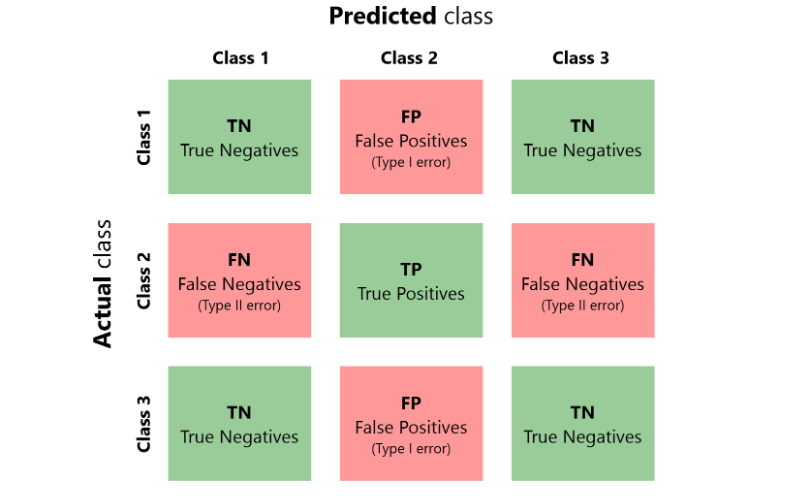

# flavanoids/proline

In [6]:
X = df[['flavanoids', 'proline']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [11]:
model = linear_model.LogisticRegression(max_iter = 500)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy = {accuracy}')

print(f1_score(y_test, y_predict, average=None))

matrix = confusion_matrix(y_test, y_predict)
print(f'\nMatrix:\n{matrix}')



Accuracy = 0.9166666666666666
[0.96296296 0.90909091 0.83333333]

Matrix:
[[13  1  0]
 [ 0 15  1]
 [ 0  1  5]]


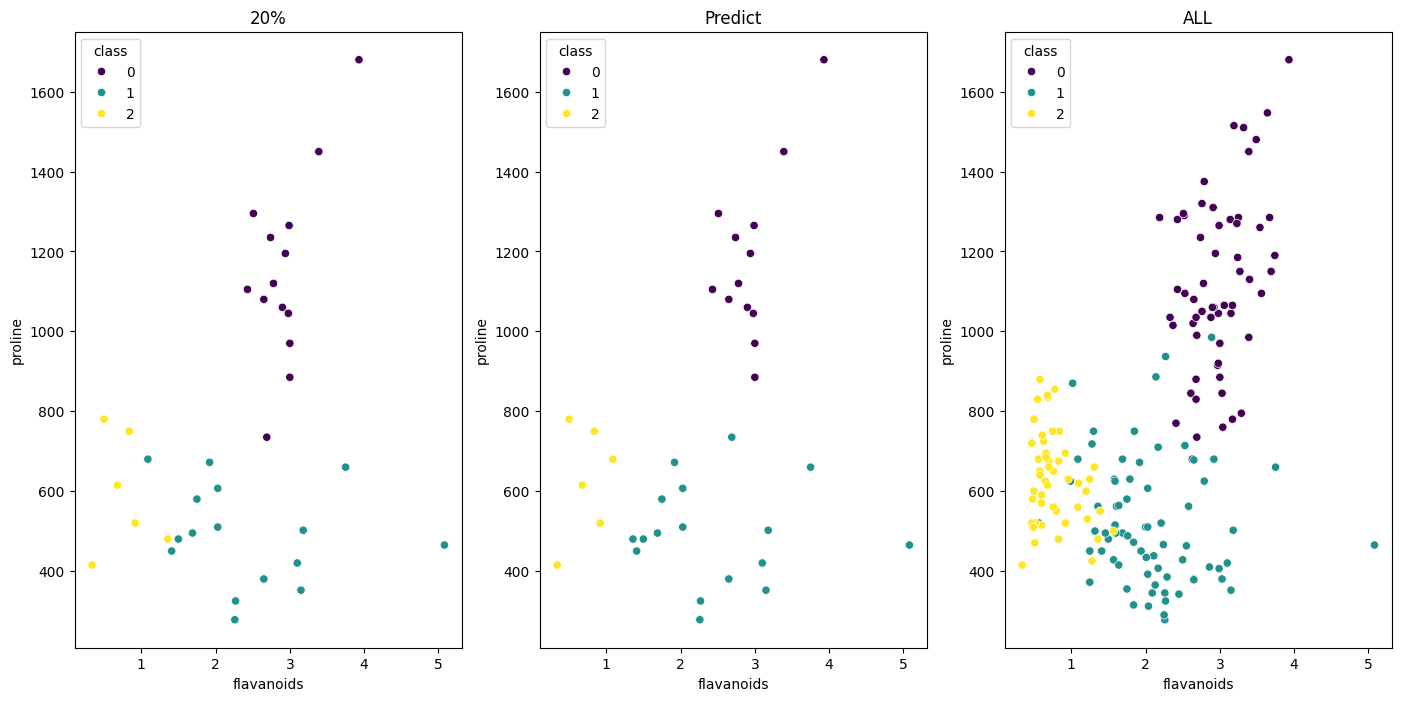

In [ ]:
plt.figure(figsize=(17,8))

plt.subplot(1, 3, 1)
sns.scatterplot(x=X_test['flavanoids'], y=X_test['proline'], hue=y_test, palette = 'viridis')
plt.legend(title='class', loc='upper left')
plt.title('20%')

plt.subplot(1, 3, 2)
sns.scatterplot(x=X_test['flavanoids'], y=X_test['proline'], hue=y_predict, palette = 'viridis')
plt.legend(title='class', loc='upper left')
plt.title('Predict')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['flavanoids'], y=df['proline'], hue=df['target'], palette = 'viridis')
plt.legend(title='class', loc='upper left')
plt.title('ALL')

plt.show()


In [ ]:
#увеличим до 25%
X = df[['flavanoids', 'proline']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



In [ ]:
model = linear_model.LogisticRegression(max_iter = 500)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy = {accuracy}')

print(f1_score(y_test, y_predict, average=None))

matrix = confusion_matrix(y_test, y_predict)
print(f'\nMatrix:\n{matrix}')

Accuracy = 0.9333333333333333
[0.96774194 0.93023256 0.875     ]

Matrix:
[[15  1  0]
 [ 0 20  1]
 [ 0  1  7]]


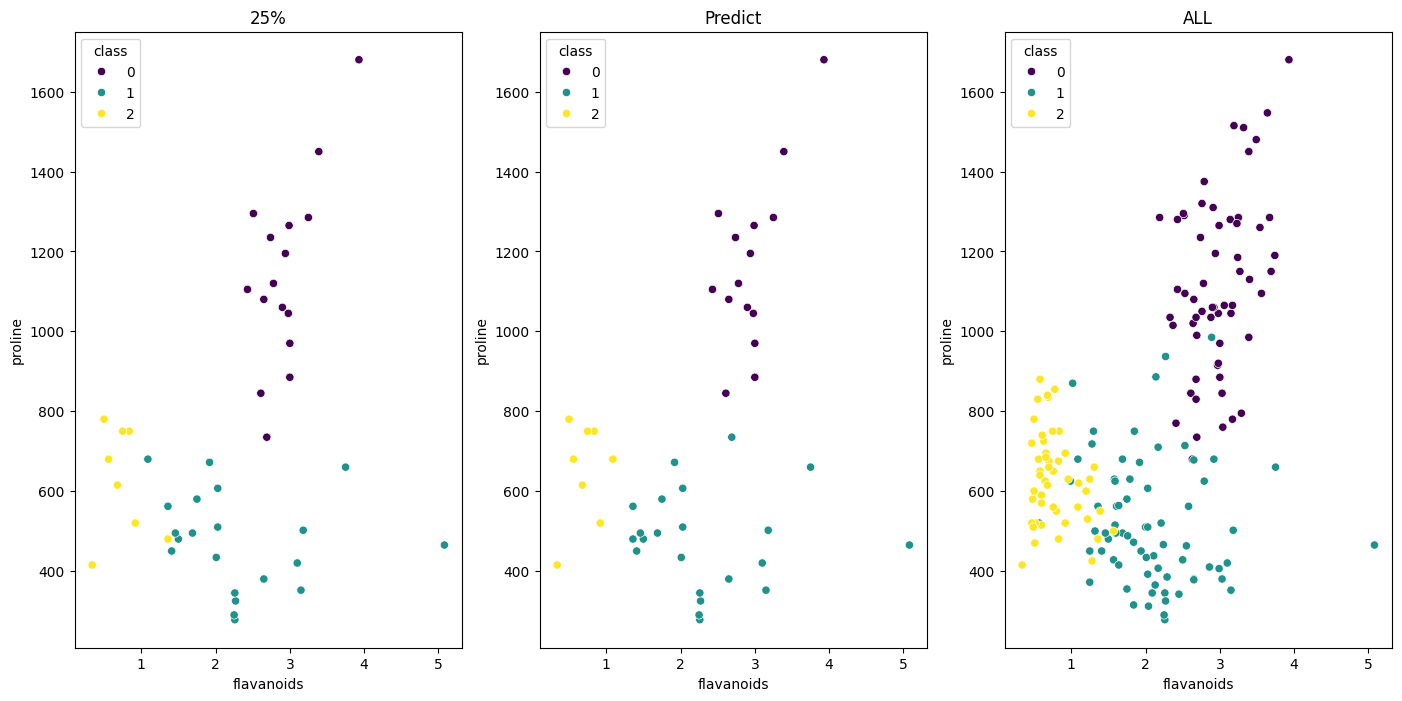

In [ ]:
plt.figure(figsize=(17,8))

plt.subplot(1, 3, 1)
sns.scatterplot(x=X_test['flavanoids'], y=X_test['proline'], hue=y_test, palette = 'viridis')
plt.legend(title='class', loc='upper left')
plt.title('25%')

plt.subplot(1, 3, 2)
sns.scatterplot(x=X_test['flavanoids'], y=X_test['proline'], hue=y_predict, palette = 'viridis')
plt.legend(title='class', loc='upper left')
plt.title('Predict')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['flavanoids'], y=df['proline'], hue=df['target'], palette = 'viridis')
plt.legend(title='class', loc='upper left')
plt.title('ALL')

plt.show()

In [ ]:
#увеличим до 30%
X = df[['flavanoids', 'proline']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)



In [ ]:
model = linear_model.LogisticRegression(max_iter = 500)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy = {accuracy}')

print(f1_score(y_test, y_predict, average=None))

matrix = confusion_matrix(y_test, y_predict)
print(f'\nMatrix:\n{matrix}')

Accuracy = 0.8888888888888888
[0.94736842 0.86956522 0.83333333]

Matrix:
[[18  1  0]
 [ 1 20  1]
 [ 0  3 10]]


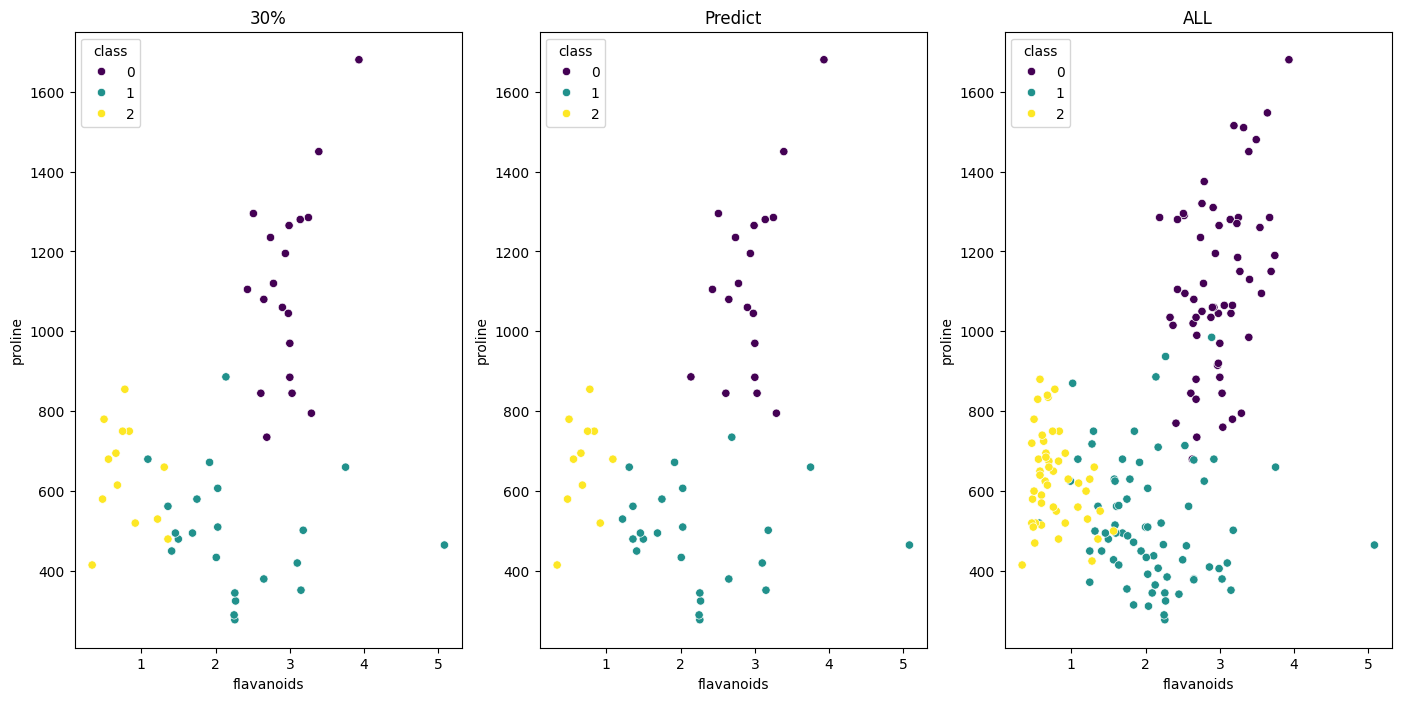

In [ ]:
plt.figure(figsize=(17,8))

plt.subplot(1, 3, 1)
sns.scatterplot(x=X_test['flavanoids'], y=X_test['proline'], hue=y_test, palette = 'viridis')
plt.legend(title='class', loc='upper left')
plt.title('30%')

plt.subplot(1, 3, 2)
sns.scatterplot(x=X_test['flavanoids'], y=X_test['proline'], hue=y_predict, palette = 'viridis')
plt.legend(title='class', loc='upper left')
plt.title('Predict')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['flavanoids'], y=df['proline'], hue=df['target'], palette = 'viridis')
plt.legend(title='class', loc='upper left')
plt.title('ALL')

plt.show()

хорошая точность при 25%; при дальнейшем росте, точность падает

# flavanoids/color_intensity

In [ ]:
X = df[['flavanoids', 'color_intensity']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
model = linear_model.LogisticRegression(max_iter = 500)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy = {accuracy}')

print(f1_score(y_test, y_predict, average=None))

matrix = confusion_matrix(y_test, y_predict)
print(f'\nMatrix:\n{matrix}')

Accuracy = 0.8333333333333334
[0.84848485 0.76923077 0.92307692]

Matrix:
[[14  0  0]
 [ 5 10  1]
 [ 0  0  6]]


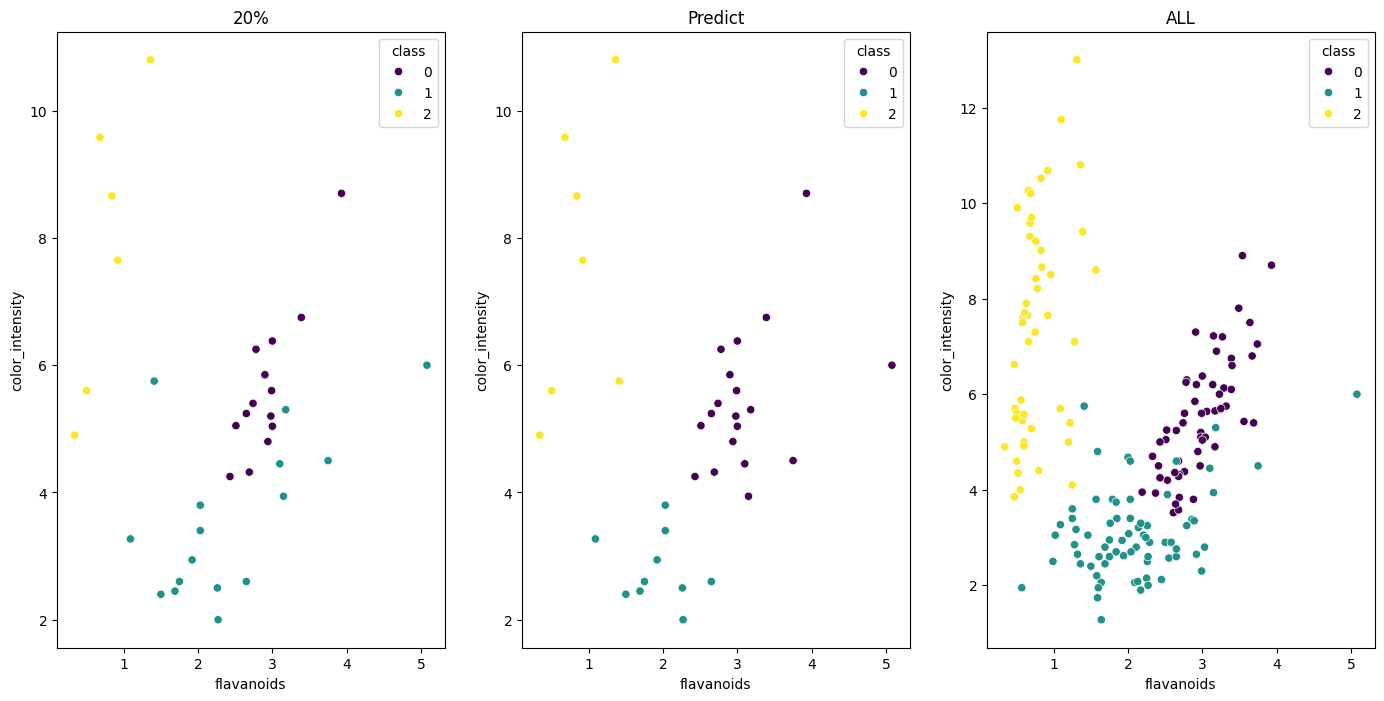

In [ ]:
plt.figure(figsize=(17,8))

plt.subplot(1, 3, 1)
sns.scatterplot(x=X_test['flavanoids'], y=X_test['color_intensity'], hue=y_test, palette = 'viridis')
plt.legend(title='class', loc='upper right')
plt.title('20%')

plt.subplot(1, 3, 2)
sns.scatterplot(x=X_test['flavanoids'], y=X_test['color_intensity'], hue=y_predict, palette = 'viridis')
plt.legend(title='class', loc='upper right')
plt.title('Predict')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['flavanoids'], y=df['color_intensity'], hue=df['target'], palette = 'viridis')
plt.legend(title='class', loc='upper right')
plt.title('ALL')

plt.show()


In [ ]:
#увеличим до 34.2%
X = df[['flavanoids', 'color_intensity']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.342, random_state = 0)


In [ ]:
model = linear_model.LogisticRegression(max_iter = 500)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy = {accuracy}')

print(f1_score(y_test, y_predict, average=None))

matrix = confusion_matrix(y_test, y_predict)
print(f'\nMatrix:\n{matrix}')

Accuracy = 0.8852459016393442
[0.86363636 0.8372093  0.97142857]

Matrix:
[[19  1  0]
 [ 5 18  1]
 [ 0  0 17]]


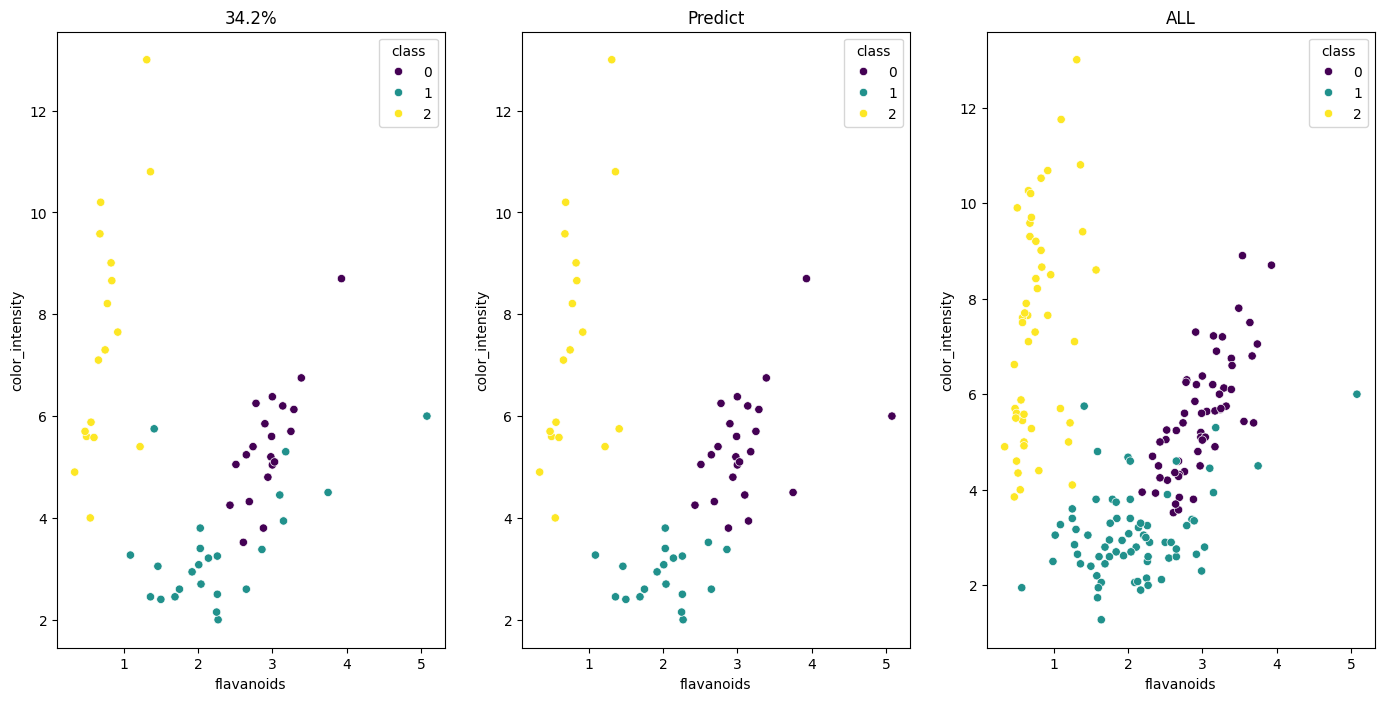

In [ ]:
plt.figure(figsize=(17,8))

plt.subplot(1, 3, 1)
sns.scatterplot(x=X_test['flavanoids'], y=X_test['color_intensity'], hue=y_test, palette = 'viridis')
plt.legend(title='class', loc='upper right')
plt.title('34.2%')

plt.subplot(1, 3, 2)
sns.scatterplot(x=X_test['flavanoids'], y=X_test['color_intensity'], hue=y_predict, palette = 'viridis')
plt.legend(title='class', loc='upper right')
plt.title('Predict')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['flavanoids'], y=df['color_intensity'], hue=df['target'], palette = 'viridis')
plt.legend(title='class', loc='upper right')
plt.title('ALL')

plt.show()

дойдя до 34,2% точность расла, а потом наблюдается снижение ее

# flavanoids/alcohol

In [ ]:
X = df[['flavanoids', 'alcohol']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


In [ ]:
model = linear_model.LogisticRegression(max_iter = 500)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy = {accuracy}')

print(f1_score(y_test, y_predict, average=None))

matrix = confusion_matrix(y_test, y_predict)
print(f'\nMatrix:\n{matrix}')

Accuracy = 0.9074074074074074
[0.9        0.88372093 0.96      ]

Matrix:
[[18  1  0]
 [ 3 19  0]
 [ 0  1 12]]


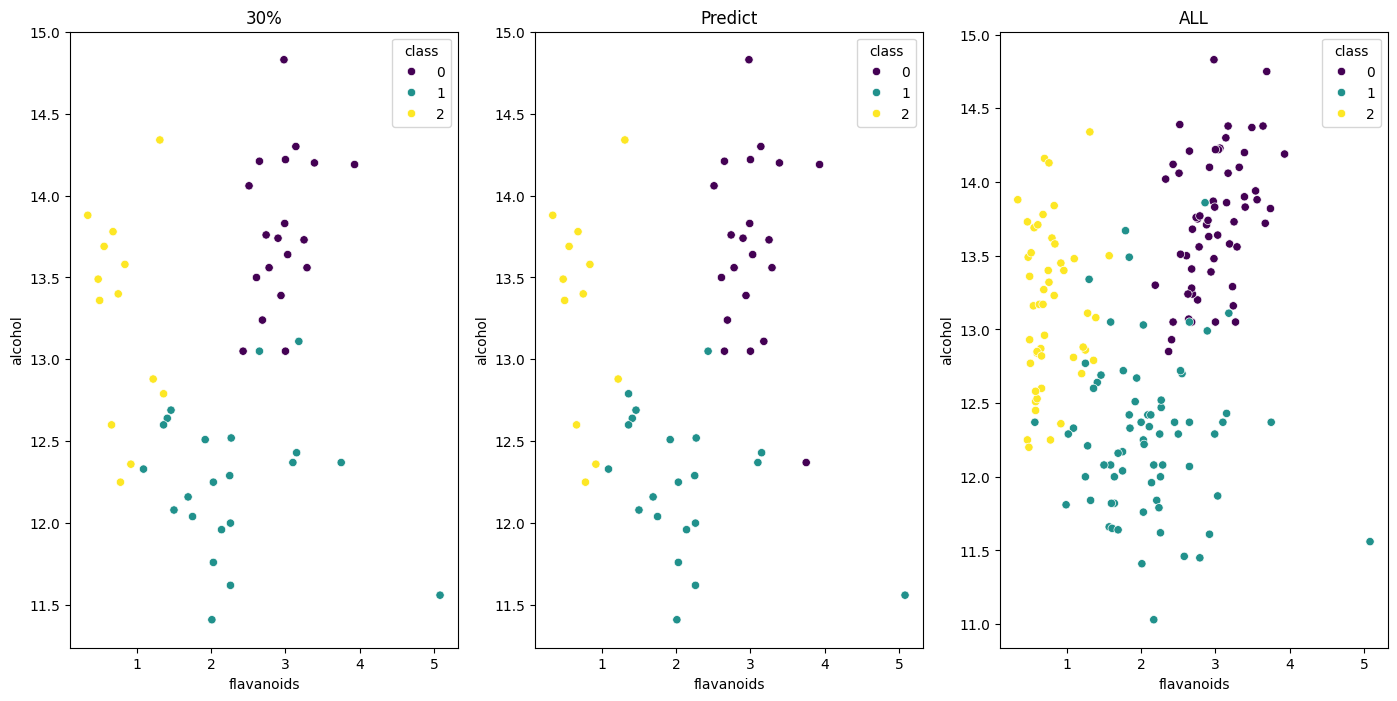

In [ ]:
plt.figure(figsize=(17,8))

plt.subplot(1, 3, 1)
sns.scatterplot(x=X_test['flavanoids'], y=X_test['alcohol'], hue=y_test, palette = 'viridis')
plt.legend(title='class', loc='upper right')
plt.title('30%')

plt.subplot(1, 3, 2)
sns.scatterplot(x=X_test['flavanoids'], y=X_test['alcohol'], hue=y_predict, palette = 'viridis')
plt.legend(title='class', loc='upper right')
plt.title('Predict')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['flavanoids'], y=df['alcohol'], hue=df['target'], palette = 'viridis')
plt.legend(title='class', loc='upper right')
plt.title('ALL')

plt.show()

**ВЫВОД**

лучше всего подходит flavanoids/proline, ее точность оказалась выше